<a href="https://colab.research.google.com/github/BBRFAST/21f22116/blob/main/Doors_Windows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [29]:
!kaggle datasets download -d bbrxpc/doors-windows

doors-windows.zip: Skipping, found more recently modified local copy (use --force to force download)


In [30]:
import zipfile
zip_ref = zipfile.ZipFile('/content/doors-windows.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [57]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [49]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/doors_windows/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/doors_windows/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 309 files belonging to 2 classes.
Found 309 files belonging to 2 classes.


In [50]:
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

  train_ds = train_ds.map(process)
  validation_ds = validation_ds.map(process)

In [58]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [59]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 32)      128       
 chNormalization)                                                
                                                      

In [60]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [61]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
10/10 [==============================] - 68s 6s/step - loss: 1.5971 - accuracy: 0.6958 - val_loss: 6.8641 - val_accuracy: 0.7055
Epoch 2/10
10/10 [==============================] - 64s 6s/step - loss: 0.7617 - accuracy: 0.8414 - val_loss: 9.2318 - val_accuracy: 0.6214
Epoch 3/10
10/10 [==============================] - 64s 6s/step - loss: 0.4448 - accuracy: 0.8997 - val_loss: 3.7669 - val_accuracy: 0.7249
Epoch 4/10
10/10 [==============================] - 59s 6s/step - loss: 0.3519 - accuracy: 0.9417 - val_loss: 2.2658 - val_accuracy: 0.7994
Epoch 5/10
10/10 [==============================] - 65s 6s/step - loss: 0.3516 - accuracy: 0.9256 - val_loss: 26.0874 - val_accuracy: 0.5210
Epoch 6/10
10/10 [==============================] - 65s 6s/step - loss: 0.3968 - accuracy: 0.9547 - val_loss: 10.9771 - val_accuracy: 0.6343
Epoch 7/10
10/10 [==============================] - 65s 6s/step - loss: 0.1666 - accuracy: 0.9547 - val_loss: 1.2758 - val_accuracy: 0.8479
Epoch 8/10
10/10 [

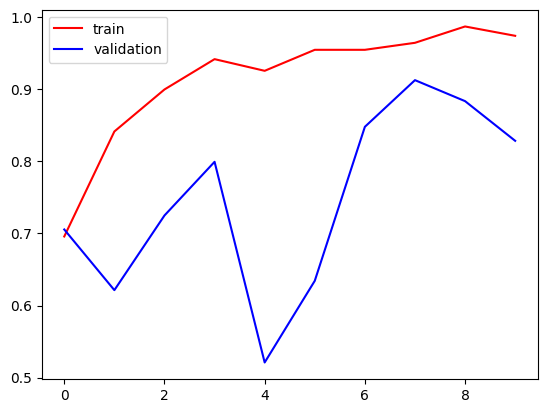

In [62]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

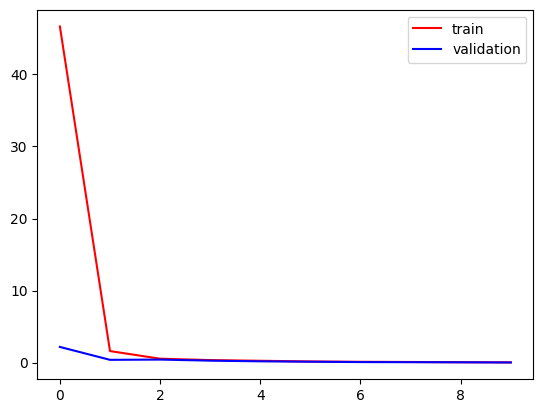

In [56]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

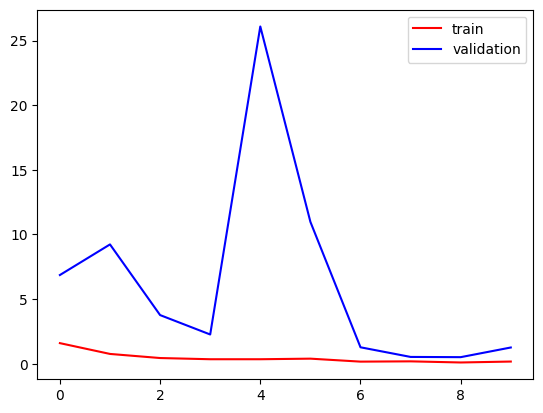

In [63]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()